In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_data)
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
train_data = pd.read_csv('C:\\Users\\priya sinha\\Desktop\\Dataset\\trainreg.csv')
test_data = pd.read_csv('C:\\Users\\priya sinha\\Desktop\\Dataset\\testreg.csv')

In [60]:
train_data = scaler.transform(train_data)
train_data=np.matrix(train_data)
poly = preprocessing.PolynomialFeatures(2)
x = poly.fit_transform(train_data[:,0:4])
m = x.shape[0]
actual_value = train_data[:,4:5]

In [83]:
test_data = scaler.transform(train_data)
test_data=np.matrix(train_data)
poly = preprocessing.PolynomialFeatures(2)
y = poly.fit_transform(test_data[:,0:4])
n = y.shape[0]
actual_value_test = test_data[:,4:5]

In [84]:
def polynomial(epoach):
    error = []
    theta=np.ones((15,1))
    for i in range(n):
        y_predicted = (theta.T.dot(x.T)).T
        J=(0.5/m)*(np.sum(np.square(y_predicted - actual_value)))
        error.append(J)
        if error[i] < 0.01:
             break
        else:
             theta = gradient_descent(theta,y_predicted)
    return(theta,error)

In [94]:
def gradient_descent(theta,y_predicted):
    alpha=0.0000000001
    theta = theta - (alpha/m)*(((y_predicted - actual_value).T.dot(x)).T)
    return(theta)

In [95]:
def sol(epoch):
    theta=polynomial(epoch)[0]
    y1_predicted = (theta.T.dot(y.T)).T
    return(y1_predicted)

In [96]:
def rms(epoch):
   y1_predicted=sol(epoch)
   return(math.sqrt(np.sum(np.square(y1_predicted-actual_value_test))/n))
   

In [99]:
rms(1000)

0.1391611441671114

In [100]:
def plot(epoch):
    error=polynomial(epoch)[1]
    print("Plot between error and number of iteration is :")
    plt.plot([i for i in range(len(error))],error)

Plot between error and number of iteration is :


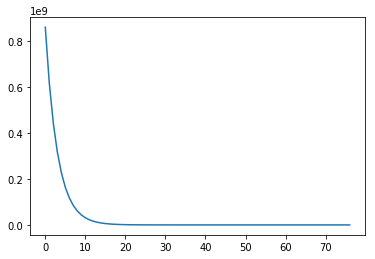

In [92]:
plot(100)